In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from util import lightningClassifier, add_background
from torchvision.datasets import ImageFolder

cards_with_background = ImageFolder('../data/playing_cards', transform=add_background)
dataloader = torch.utils.data.DataLoader(cards_with_background, batch_size=8, shuffle=True)

In [2]:
checkpoint = '../data/checkpoints/resnet_playing_cards.ckpt'
classifier = lightningClassifier.load_from_checkpoint(checkpoint)
classifier.eval()
model = classifier.model

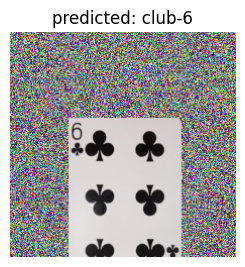

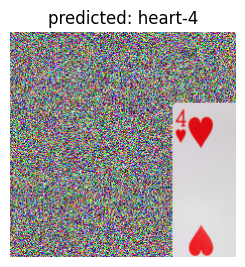

In [3]:
device = classifier.device

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {cards_with_background.classes[preds[j].item()]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

visualize_model(model, 2)